# Project Title - Asteroid Dataset

I have collected this Dataset from which is officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA. In this Dataset all kinds of Data related to Asteroid is included. This Dataset is publicly available in their website. 
Website Link- [JPL Small-Body Database Search Engine](https://ssd.jpl.nasa.gov/sbdb_query.cgi)
You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

Let us save and upload our work to Jovian before continuing.

In [4]:
!pip install jovian opendatasets --upgrade --quiet


In [6]:
dataset_url = 'https://www.kaggle.com/sakhawat18/asteroid-dataset' 
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedamanal
Your Kaggle Key: ········


  3%|▎         | 5.00M/182M [00:00<00:04, 38.1MB/s]

100%|██████████| 182M/182M [00:02<00:00, 84.5MB/s] 


In [ ]:
import pandas as pd
# file_path = './asteroid-dataset/dataset.csv'
asteroid_df= pd.read_csv('./asteroid-dataset/dataset.csv')
project_name = "zerotopandas-eda-asteroid-dataset" # change this (use lowercase letters and hyphens only)


In [ ]:
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "manal-kaleem/zerotopandas-eda-asteroid-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...


## Data Preparation and Cleaning

Let's start by first looking into our dataset to get some insight


In [1]:
asteroid_df.shape

NameError: name 'asteroid_df' is not defined

**Our dataset has record for 45 features of 958524 asteroids**

In [3]:
asteroid_df.head()


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
asteroid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
asteroid_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [ ]:
# asteroid_df.drop(asteroid_df[asteroid_df.neo == 'N' ].index, inplace = True)
# asteroid_df = asteroid_df[asteroid_df.neo == 'Y' ]

check for missing values

In [7]:
asteroid_df.isnull().sum()
# asteroid_df[asteroid_df['neo']=='N']['H'].isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


Columns name, prefix, diameter, albedo and diameter_sigma has lots of missing values, these can be removed.

In [8]:
asteroid_df.drop(['name', 'prefix', 'albedo', 'diameter', 'diameter_sigma'], axis = 1, inplace = True)

In [ ]:
jovian.commit()

## Exploratory Analysis and Visualization

### We want to extract some information about Potentially Hazardous Asteroids 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Q1: What percentage of asteroids are near earth objects

In [10]:
asteroid_df['neo'].value_counts(normalize = True)*100


N    97.611422
Y     2.388578
Name: neo, dtype: float64

Almost 2.4 percent of asteroids are near earth objects

#### Q2: How many of Near earth objects are potentially Hazerdous

Text(0, 0.5, 'Percentage of PHA')

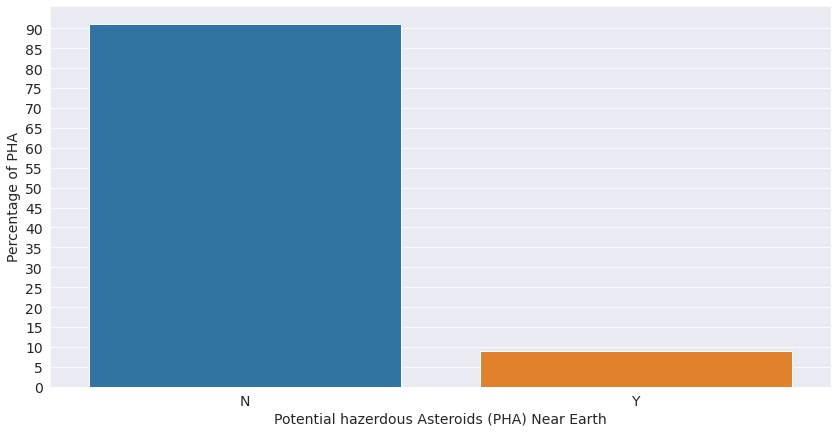

In [11]:


#What percentage of near earth objects are potentially harzardeous

percent = asteroid_df[asteroid_df['neo'] == 'Y']['pha'].value_counts(normalize = True)*100

a = sns.barplot(x = percent.index , y = percent)
plt.yticks(range(0, 91, 5))
plt.xlabel('Potential hazerdous Asteroids (PHA) Near Earth')
plt.ylabel('Percentage of PHA')

Looking at the above graph, we can conclude that only **9%** of the near earth objects are hazardous.

In [12]:
asteroid_df['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

#### Q3. Potentially hazardeous asteroids belongs to what orbit classes?

APO    85.575992
ATE     8.422072
AMO     5.711520
IEO     0.290416
Name: class, dtype: float64


Text(0.5, 1.0, 'Percentage of Orbital classes to which hazerdous asteroids belong')

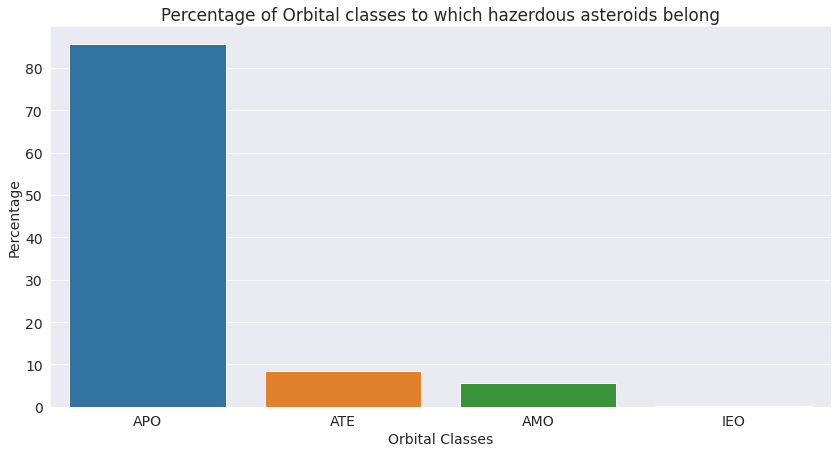

In [13]:
percent2 = asteroid_df[asteroid_df['pha']== 'Y']['class'].value_counts(normalize= True)*100
print(percent2)
sns.barplot(x = percent2.index, y = percent2)
plt.xlabel('Orbital Classes')
plt.ylabel('Percentage')
plt.title('Percentage of Orbital classes to which hazerdous asteroids belong')

Most of the Potentially harzerdous asteroids (>85%) belongs to the **APO** class

#### Q4: what is the average absolute magnitude parameter of potentially hazardeous asteroids per class

<AxesSubplot:xlabel='class', ylabel='H'>

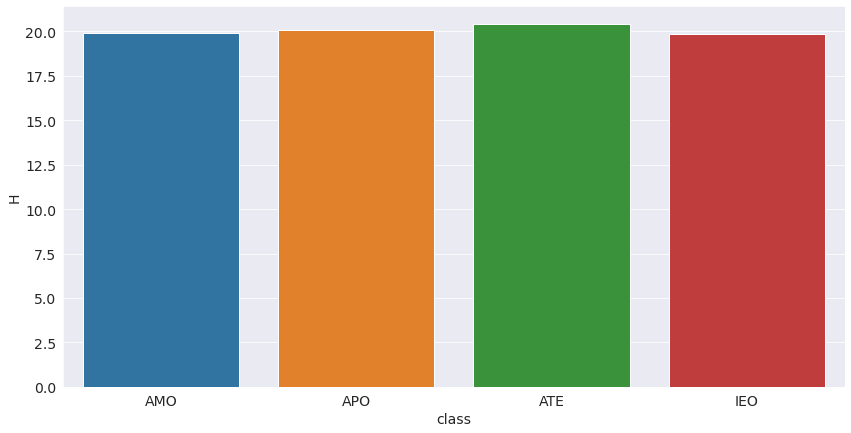

In [14]:
classes = asteroid_df[asteroid_df['pha']== 'Y']['class'].unique()
abs_mag_df = asteroid_df.loc[(asteroid_df['class'].isin(classes)) & (asteroid_df['pha'] == 'Y')]
h_mean = abs_mag_df.groupby('class')['H'].mean()
sns.barplot(x = h_mean.index, y = h_mean)


Average absolute magnitude parameter for potentially hazardeous asteroid in each class is approximatley 20

#### Q5: what is the average absolute magnitude parameter of potentially hazardeous asteroids of all classes

<AxesSubplot:xlabel='H', ylabel='Density'>

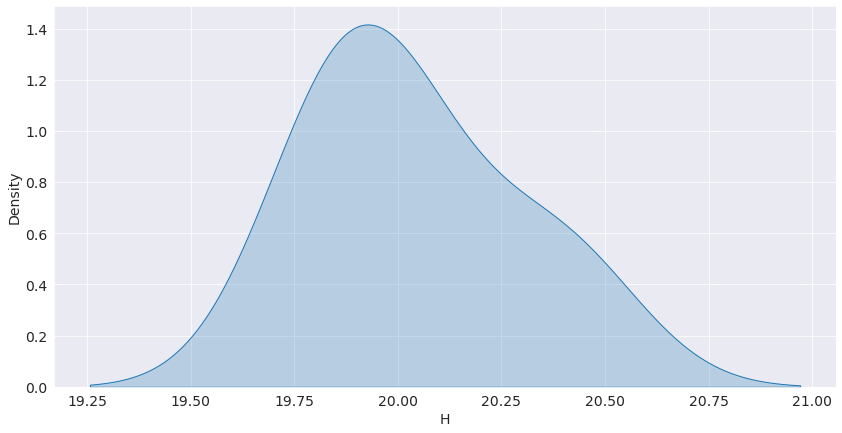

In [15]:
sns.kdeplot(data = h_mean, shade = True)

The average of absolute magnitude parameter(h) is around 20 for **potentially hazardeous asteroids**

#### Q6: what is the average rms value of signal for Potentially hazardous asteroid

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rms', ylabel='Density'>

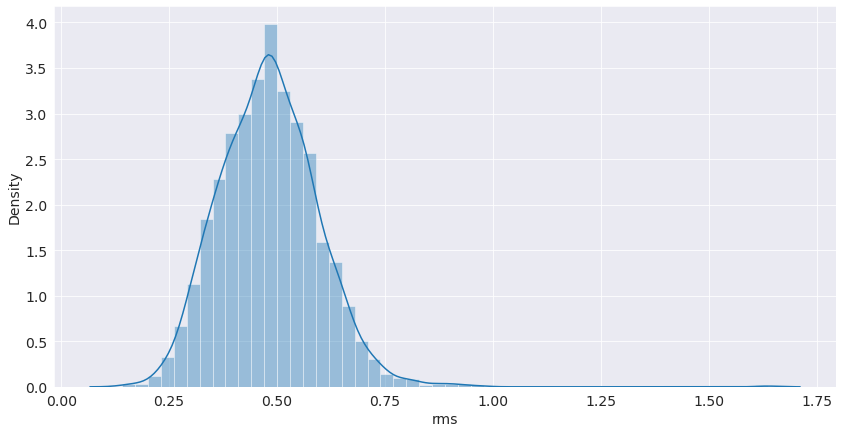

In [22]:
from sklearn import preprocessing



numerical_cols = [colname for colname in asteroid_df.columns if asteroid_df[colname].dtype in ['int64', 'float64']]
plot_df = asteroid_df[asteroid_df['pha']=='Y'][numerical_cols]

# scaler = preprocessing.MinMaxScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(plot_df), columns = plot_df.columns)

sns.distplot(a = plot_df['rms'])


In [ ]:
Let us save and upload our work to Jovian before continuing

In [23]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/manal-kaleem/zerotopandas-eda-asteroid-dataset


<IPython.core.display.Javascript object>